In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
# Load Data
data_path = 'C:\Kaam\medical_insurance_price_prediction\data\insurance.csv'
data = pd.read_csv(data_path)
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Data Preprocessing
def preprocess_data(data):
    # Handle missing values if any
    data = data.dropna()
    
    # Encode categorical variables
    data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)
    
    return data

data = preprocess_data(data)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


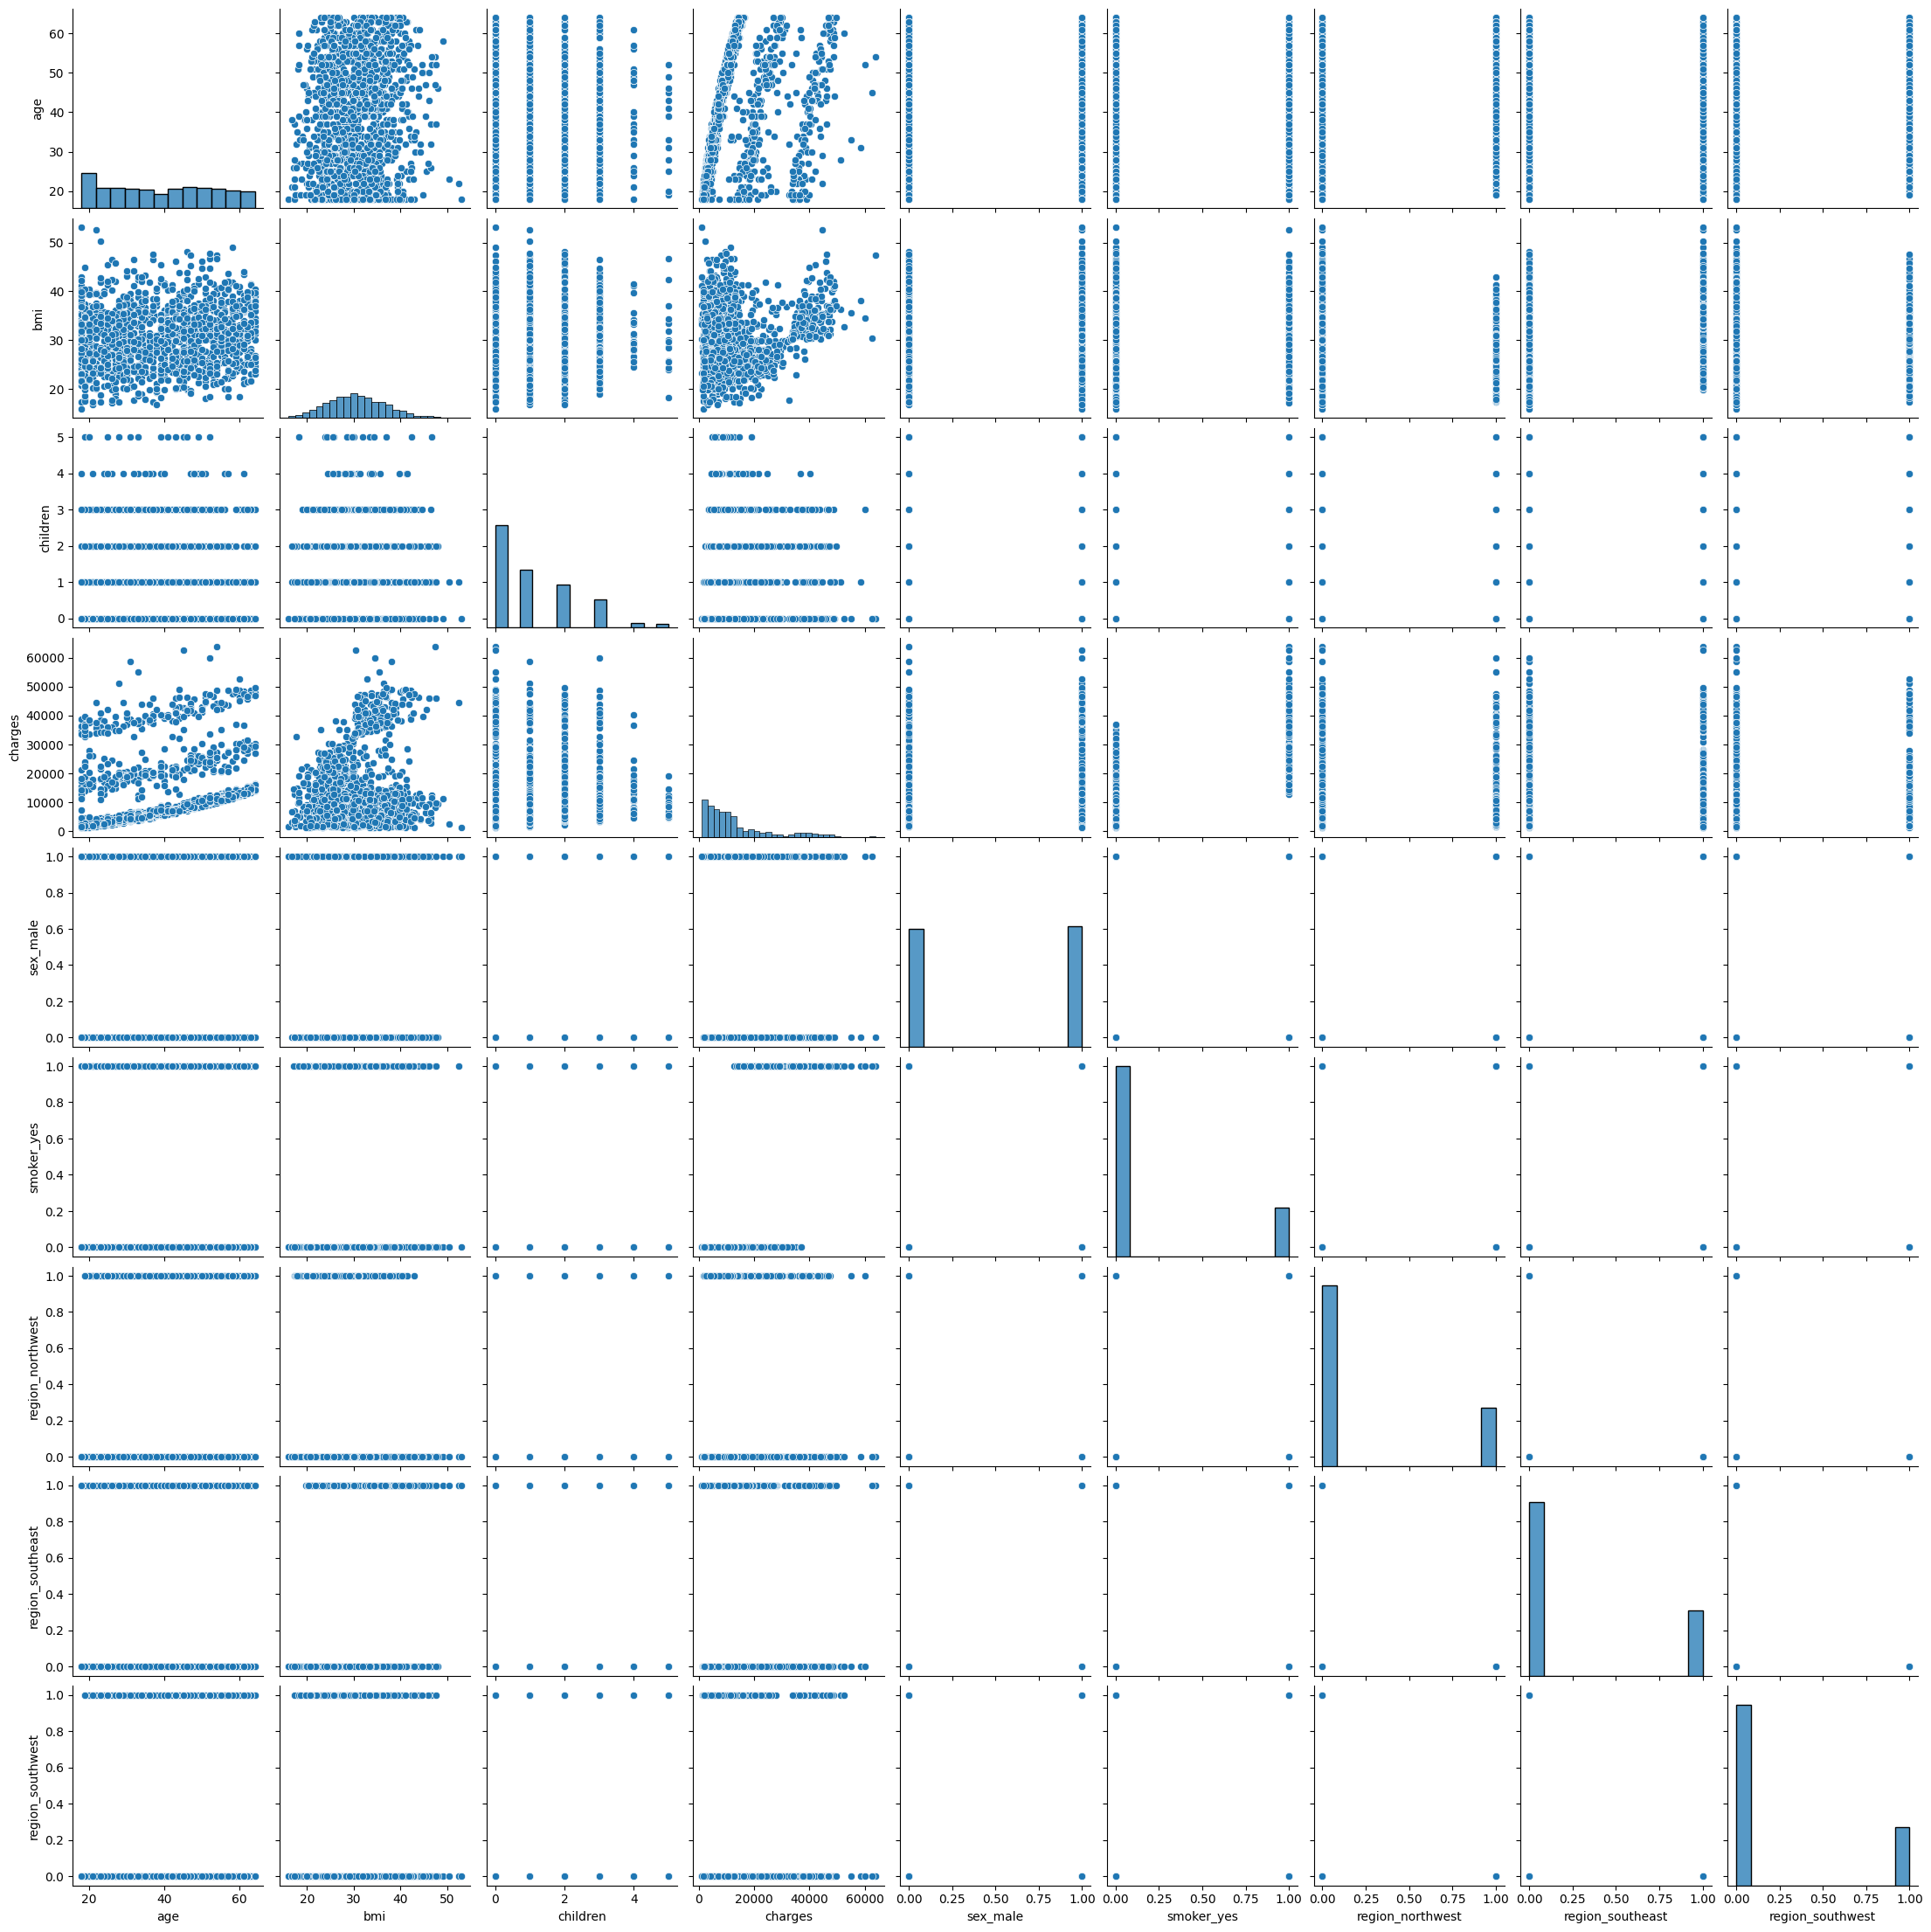

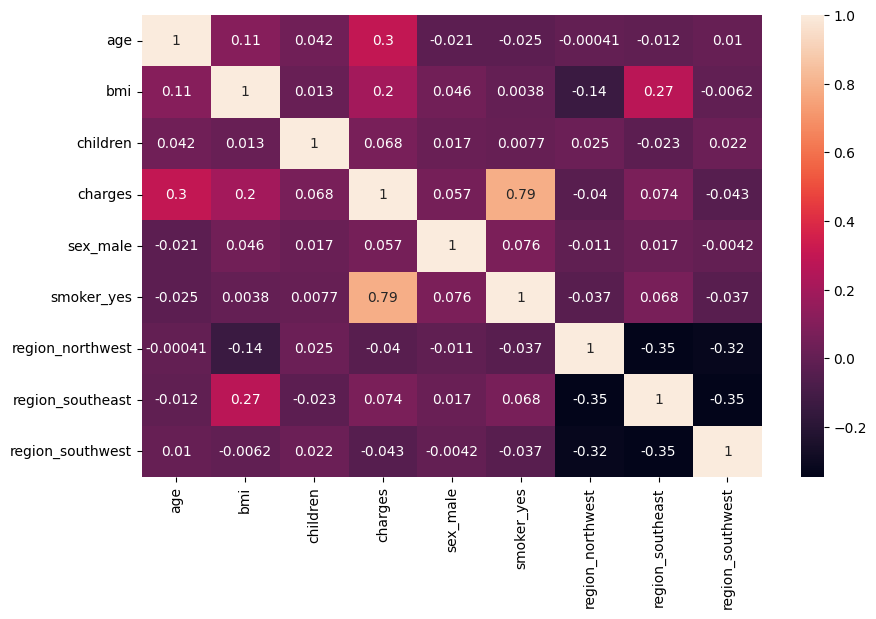

In [10]:
# Exploratory Data Analysis (EDA)
def eda(data):
    # Display basic statistics
    print(data.describe())

    # Pairplot
    sns.pairplot(data)
    plt.show()

    # Encode categorical variables for correlation analysis
    data_encoded = pd.get_dummies(data, drop_first=True)

    # Correlation heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(data_encoded.corr(), annot=True)
    plt.show()

eda(data)

In [11]:
# Feature Engineering
def feature_engineering(data):
    scaler = StandardScaler()
    numerical_features = ['age', 'bmi', 'children']
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    return data

data = feature_engineering(data)
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False


In [12]:
# Split Data
def split_data(data):
    X = data.drop('charges', axis=1)
    y = data['charges']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(data)

In [13]:
# Train Model
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)


In [14]:
# Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'R2: {r2}')

evaluate_model(model, X_test, y_test)


MAE: 2545.214924655166
MSE: 20866223.19798948
RMSE: 4567.956129166466
R2: 0.8655948876523016
